<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("skimr")
install.packages("psych")
install.packages("lsr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("effsize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(tidyverse)
require(readxl)
library(skimr)
library(psych)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [4]:
install.packages("tibble")
library(tibble)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
meta <- read_xlsx('/content/metadata.xlsx', sheet =1)
meta <- rename_with(meta, make.names)
meta <- select(meta, -Name, -Sucrose)
meta <- mutate(meta,Patient.number = as.factor(Patient.number),
              Vial.number = as.factor(Vial.number),
              Group = as.factor(Group),
              Sm = as.factor(Sm),
              LVH = as.factor(LVH),
              IHD = as.factor(IHD),
              MI = as.factor(MI),
              Str = as.factor(Str),
              A_C = as.factor(A_C),
              A_H = as.factor(A_H),
              A_D = as.factor(A_D))



In [6]:
descriptive <- read_xlsx('/content/metadata.xlsx', sheet = 2)
descriptive <- rename(descriptive, 'Variable'='...1', 'Description' = '...2')
descriptive <- drop_na(descriptive)

In [7]:
attr(meta$Ht, "label") <- "Growth"
attr(meta$Wt, "label") <- "Weight"
attr(meta$BMI, "label") <- "Body mass index"
attr(meta$Sys, "label") <- "Systolic blood pressure"
attr(meta$Dia, "label") <- "Diastolic blood pressure"
attr(meta$PR, "label") <- "Pulse"
attr(meta$Sm, "label") <- "Smoking"
attr(meta$Dm, "label") <- "Diabetes"
attr(meta$HT, "label") <- "Hypertension"
attr(meta$LVH, "label") <- "Left ventricular hypertrophy by electrocardiogram"
attr(meta$MI, "label") <- "Medical history of infarction"
attr(meta$Str, "label") <- "Medical history of stroke"
attr(meta$A_C, "label") <- "Family history of CAD"
attr(meta$A_H, "label") <- "Family history hypertension"
attr(meta$A_D, "label") <- "Family history diabetes"
attr(meta$Choi...25, "label") <- "Cholesterol"
attr(meta$Choi...29, "label") <- "Cholesterol"
attr(meta$Tgi...26, "label") <- "Triglycerides"
attr(meta$Tgi...30, "label") <- "Triglycerides"
attr(meta$HDLi...27, "label") <- "High density lipoprotein"
attr(meta$HDLi...31, "label") <- "High density lipoprotein"
attr(meta$LDLi...28, "label") <- "Low density lipoprotein"
attr(meta$LDLi...32, "label") <- "Low density lipoprotein"
attr(meta$AI, "label") <- "Atherogenicity index"



In [8]:
meta <- meta %>%
  mutate(Age_interval = cut(Age, breaks = c(0, 50, 60, 70, 80, Inf), labels = c("<50", "50-60", "60-70", "70-80", ">80")))

In [9]:
meta <- meta %>%
  mutate(PR_interval = cut(PR, breaks = c(60, 80, 90, Inf), labels = c("<60", "60-80", ">90")))

In [10]:
meta <- meta %>%
  mutate(BMI_weight = cut(BMI, breaks = c(0, 20, 25, 30, 35, 40, Inf), labels = c("0", "1","2", "3", "4", "5")))

# 0 - "underweight", 1 - "normal", 2- "overweight", 3-  "obese_1", 4- "obese_2", 5-"obese_3"

Индекс атерогенности — отношение общего холестерина к холестерину липопротеинов высокой плотности.
Эмпирическая гипотеза. Влияет ли наличие диабета на индекс атерогенности?

Нулевая гипотеза. Диабет не влияет индекс атерогенности.

Альтернативня гипотеза. Диабет влияет на повышение индекса атерогенности?


Индекс атерогенности.

ЗП - Индекс атерогенности
НП - Диабет
Выборки независимые

Посмотрим на распределение AI.









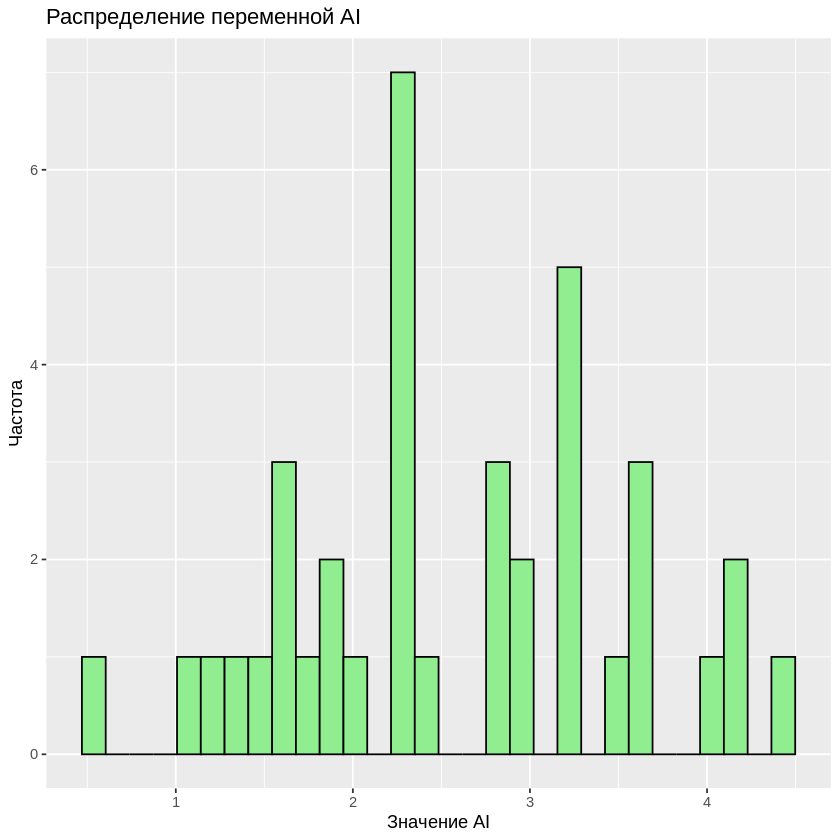

In [35]:
ggplot(data = meta, aes(x= AI)) +
  geom_histogram(fill = "lightgreen", color = "black", bins = 30) +
  labs(title = "Распределение переменной AI", x = "Значение AI", y = "Частота")

# Визуально сложно указать распределение, вроде бы стремиться к нормальному. Идем дальше

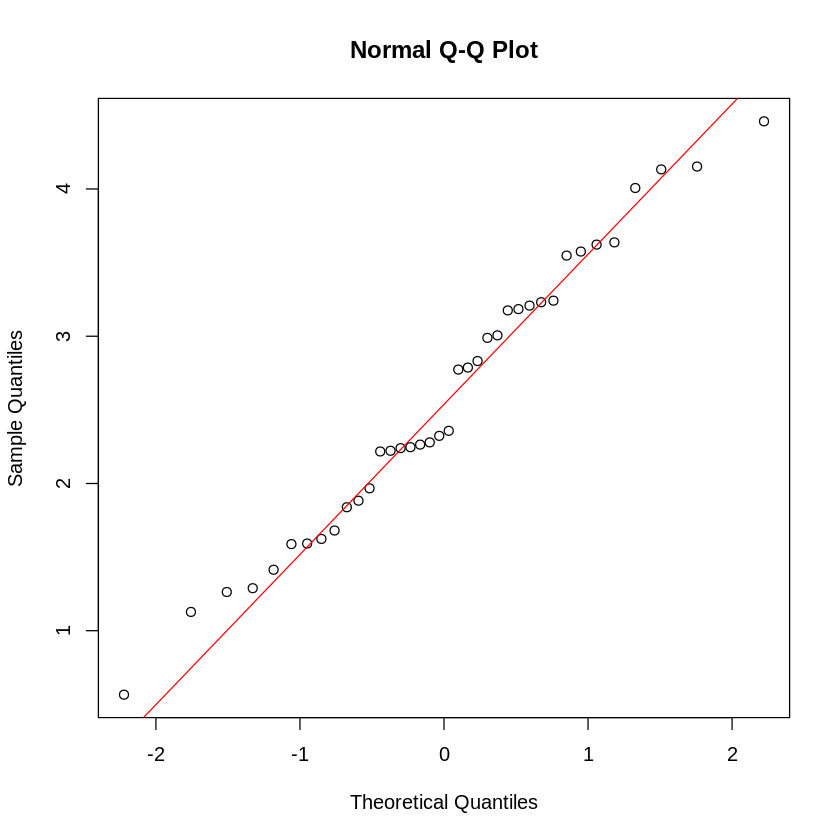

In [29]:
qqnorm(meta$AI)
qqline(meta$AI, col = "red")

# QQplot тоже показывает, что распределение стремиться к нормальному

In [14]:
shapiro.test(meta$AI) # Тест Шапиро-Уилка. Данные следуют нормальному распределению.


	Shapiro-Wilk normality test

data:  meta$AI
W = 0.97833, p-value = 0.6582


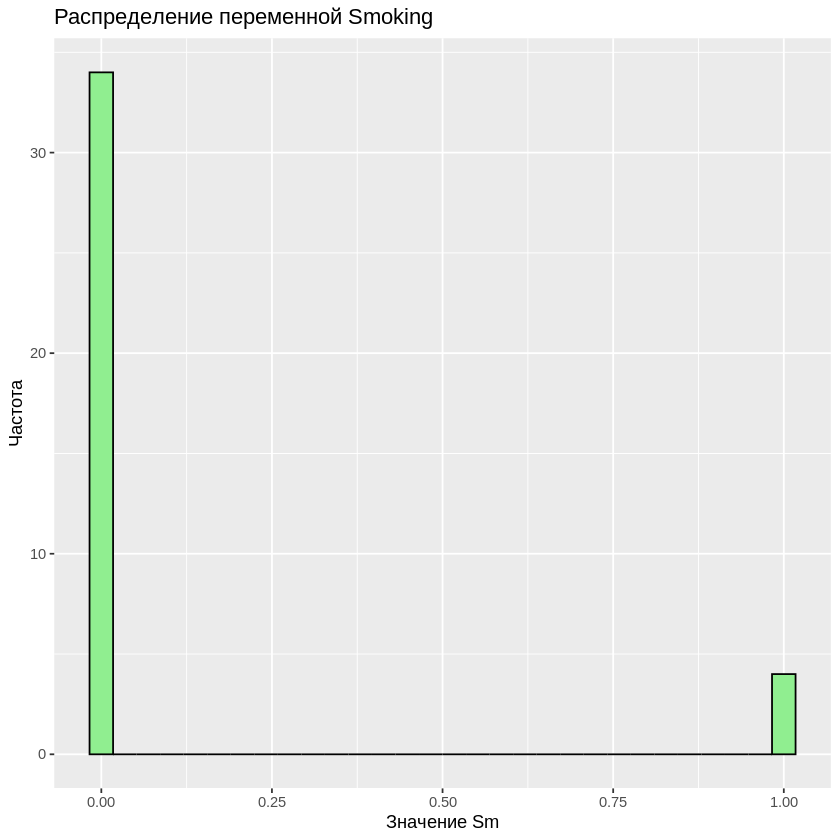

In [15]:
ggplot(data = meta, aes(x= Dm)) +
  geom_histogram(fill = "lightgreen", color = "black", bins = 30) +
  labs(title = "Распределение переменной Smoking", x = "Значение Sm", y = "Частота")

#распределение по диабету. НП - категориальная бинарная

In [16]:
# Выберем t-тест.
# p-value = 0.7323 - > разница между средними двумя выборок не является статистически значимой, мы не можем отклонить нулевую гипотезу.
# Наличие диабета не влияет на индекс атерогенности

t.test(log10(meta$AI[meta$Dm == 0]),
       log10(meta$AI[meta$Dm == 1]))



	Welch Two Sample t-test

data:  log10(meta$AI[meta$Dm == 0]) and log10(meta$AI[meta$Dm == 1])
t = -0.36363, df = 4.5796, p-value = 0.7323
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2301802  0.1745062
sample estimates:
mean of x mean of y 
0.3712527 0.3990897 


In [17]:
meta %>%
  mutate(norm_AI = log10(AI)) %>%
  lsr:: cohensD(data = ., formula = norm_AI ~ Dm)

# разница между средними значениями двух переменных относительно их стандартного отклонения малая. Различий нет

[1] 0.1451578

In [18]:
meta %>%
  mutate(norm_AI = log10(AI)) %>%
  effsize:: cohen.d(formula = norm_AI ~ Dm, data = .)


Warning message in cohen.d.formula(formula = norm_AI ~ Dm, data = .):
“Cohercing rhs of formula to factor”



Cohen's d

d estimate: -0.1451578 (negligible)
95 percent confidence interval:
     lower      upper 
-1.2177281  0.9274126 


carotid.IMT.mean — средняя толщина интима-медиа общей сонной артерии

Choi...29 - Общий холестирин

Посмотрим есть ли линейная связь между этими двумя переменными и на сколько сильная.

ЗП - carotid.IMT.mean
НП - Choi...29

Обе переменные - количественные непрерывные переменные.
Группы одинакового размера.
Посмотрим на наличие линейной связи между переменными с помощью корреляции Пирсона.


Посмотрим на распределение.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


$title
[1] "Distribution of Choi...29"

attr(,"class")
[1] "labels"

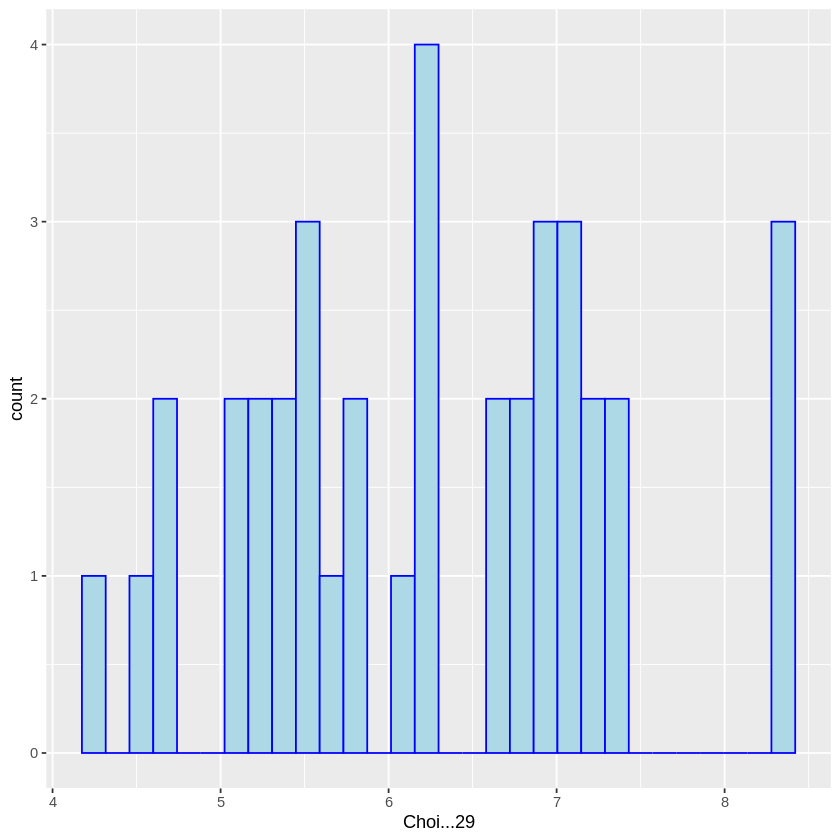

In [95]:
ggplot(meta, aes(Choi...29)) +
  geom_histogram(color = "blue", fill = "lightblue")
  ggtitle("Distribution of Choi...29")

# Распределение по холестирину, кажется стремится к нормальному

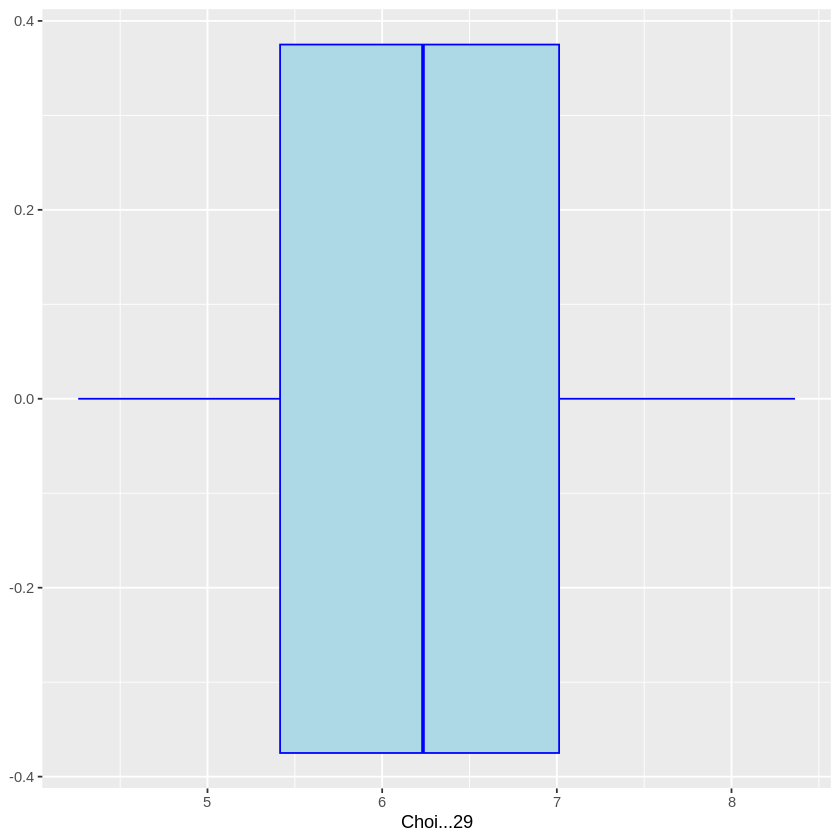

In [96]:
ggplot(meta, aes(Choi...29)) +
  geom_boxplot(color = "blue", fill = "lightblue")

# Выбросов нет

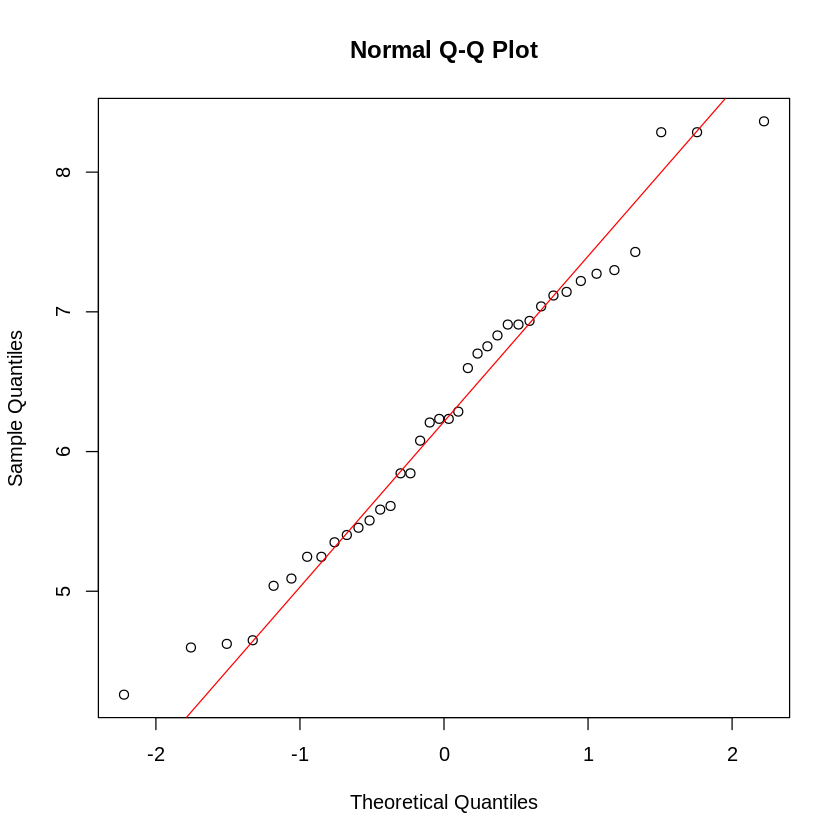

In [97]:
qqnorm(meta$Choi...29)
qqline(meta$Choi...29, col = "red")

In [98]:
shapiro.test(meta$Choi...29) # Тест Шапиро-Уилка. Данные следуют нормальному распределению.


	Shapiro-Wilk normality test

data:  meta$Choi...29
W = 0.96942, p-value = 0.3763


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


$title
[1] "Distribution of carotid.IMT.mean"

attr(,"class")
[1] "labels"

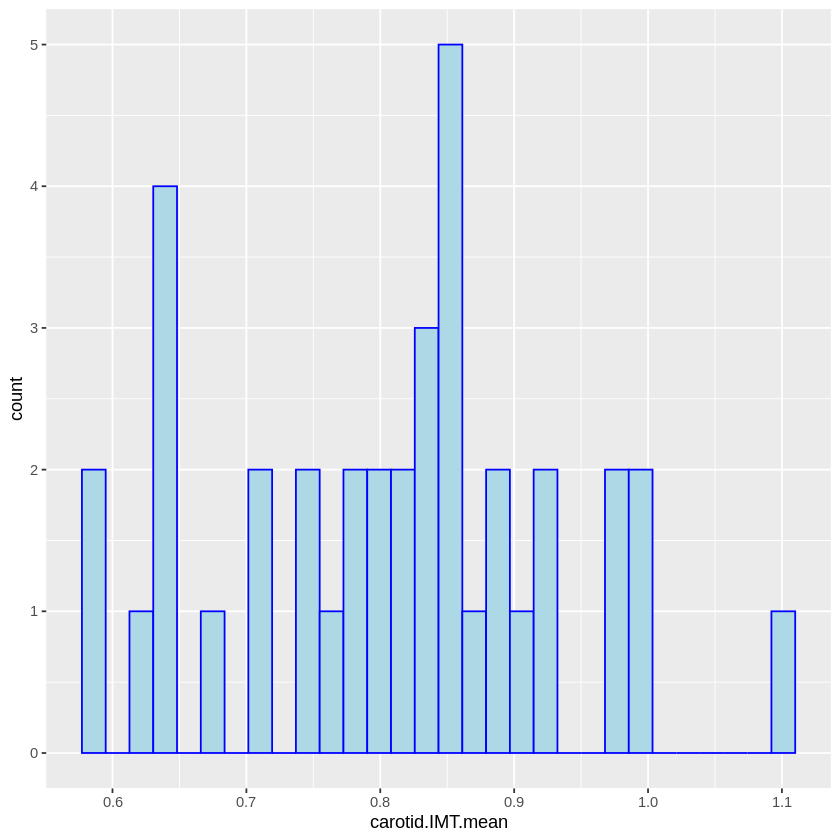

In [99]:
#посмотрим на переменную carotid.IMT.mean
ggplot(meta, aes(carotid.IMT.mean)) +
  geom_histogram(color = "blue", fill = "lightblue")
  ggtitle("Distribution of carotid.IMT.mean")

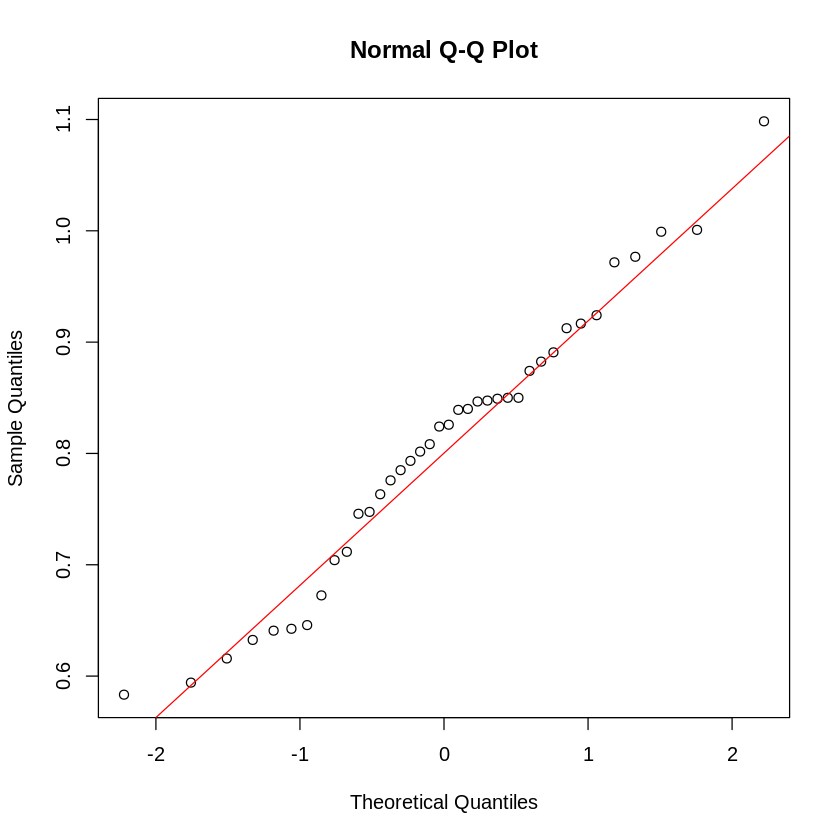

In [100]:
qqnorm(meta$carotid.IMT.mean)
qqline(meta$carotid.IMT.mean, col = "red")

In [101]:
shapiro.test(meta$carotid.IMT.mean) # Тест Шапиро-Уилка. Данные следуют нормальному распределению.


	Shapiro-Wilk normality test

data:  meta$carotid.IMT.mean
W = 0.97518, p-value = 0.5488


In [ ]:
# ЗП, НП являются количественными непрерывными переменными. Нормально распределены
# C помощью корреляции Пирсона определим налчие и силу линейной взаимосвязи между переменными.

In [102]:
meta %>%
  dplyr::select(Choi...29, carotid.IMT.mean)

Choi...29,carotid.IMT.mean
<dbl>,<dbl>
5.584416,0.6425000
7.038961,0.8400000
5.350649,0.8500000
6.909091,0.8241667
5.038961,1.0983333
7.428571,0.8475000
7.272727,0.6725000
6.935065,0.7850000
8.285714,0.8491667


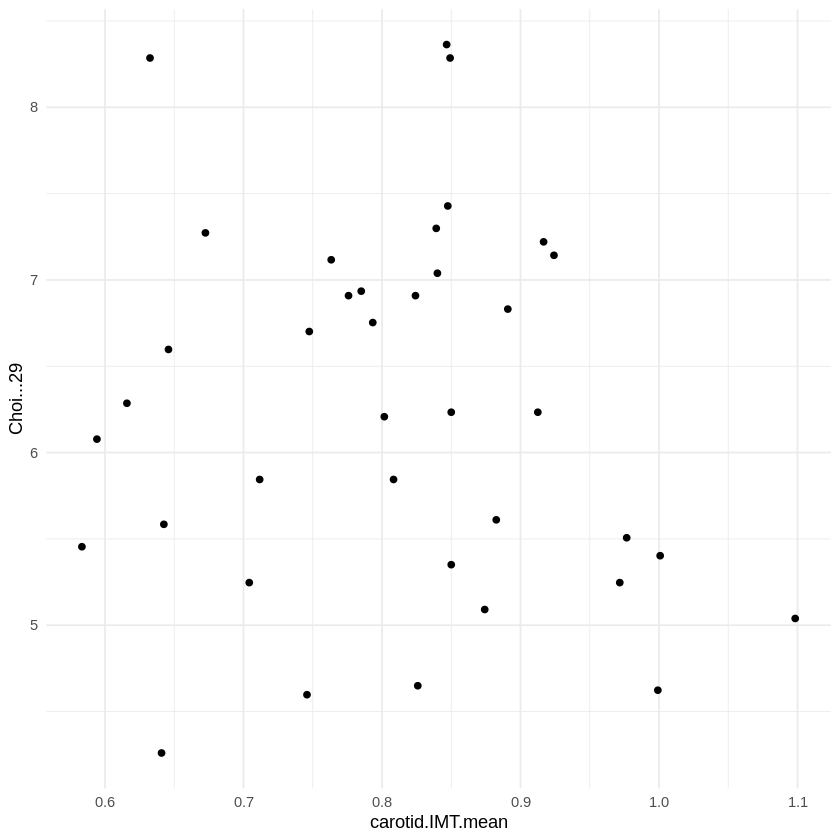

In [103]:
ggplot(meta, aes(x = carotid.IMT.mean, y = Choi...29)) +
  geom_point() +
  theme_minimal()

# корреляции нет

In [104]:
corr.test(meta$Choi...29, meta$carotid.IMT.mean) # кажется что связь -0.11 слабая. Нет линейной связи между индексом массы тела и средней толщиной интима-медиа общей сонной артерии

Call:corr.test(x = meta$Choi...29, y = meta$carotid.IMT.mean)
Correlation matrix 
[1] -0.11
Sample Size 
[1] 38
These are the unadjusted probability values.
  The probability values  adjusted for multiple tests are in the p.adj object. 
[1] 0.52

 To see confidence intervals of the correlations, print with the short=FALSE option

HT — наличие ГБ

A_H - наличие ГБ в семейном анамнезе

Обе переменные категориальные.
Количество наблюдений больше 20



In [109]:
ctable <- meta %>%
  drop_na() %>%
  dplyr:: select(HT, A_H) %>%
  table() %>%
  addmargins()



In [110]:
ctable # наблюденйи больше 20

,0,1,Sum
0,7,2,9
1,9,7,16
Sum,16,9,25


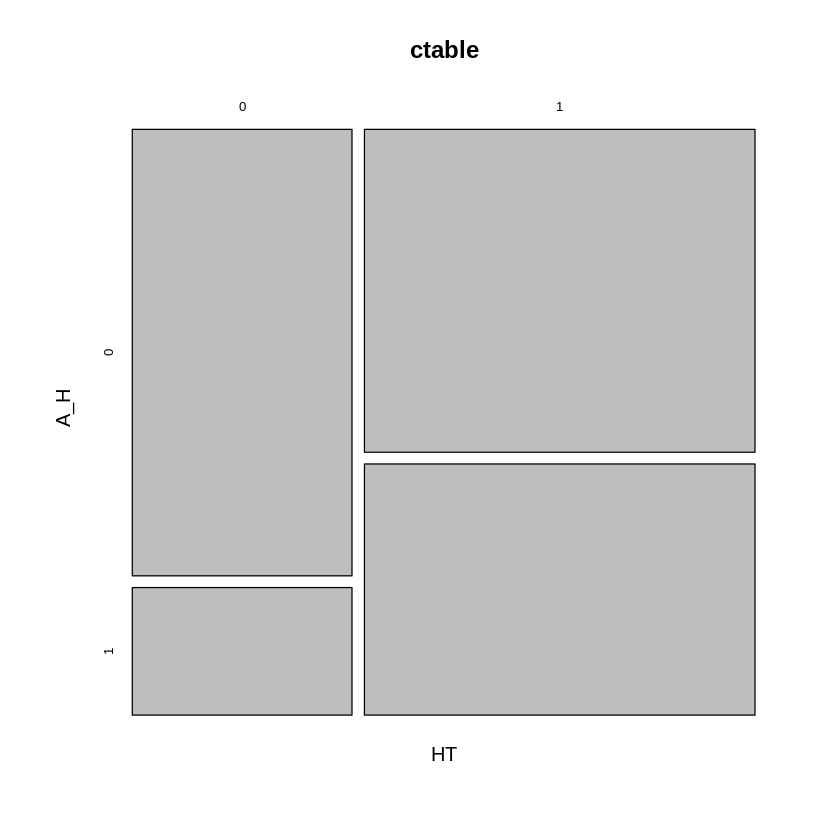

In [177]:
mosaicplot(ctable) # размер выборок стремится к сходному

In [111]:
chisq.test(ctable) # предупреждвет от не точности результата,  p-value = 0.8849 очень больщой

Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  ctable
X-squared = 1.1586, df = 4, p-value = 0.8849


In [112]:
fisher.test(ctable) #значимых результатов между группами нет.


	Fisher's Exact Test for Count Data

data:  ctable
p-value = 0.9041
alternative hypothesis: two.sided


BMI_weight - группы по ИМТ
НТ - ГБ

Обе переменные категориальные.
посмотрим связаны ли эти две категории.

In [116]:
ctable2 <- xtabs(~BMI_weight + HT, data = meta) %>%
  addmargins()

In [117]:
ctable2

,0,1,Sum
0,0,0,0
1,10,6,16
2,3,9,12
3,2,3,5
4,0,5,5
5,0,0,0
Sum,15,23,38


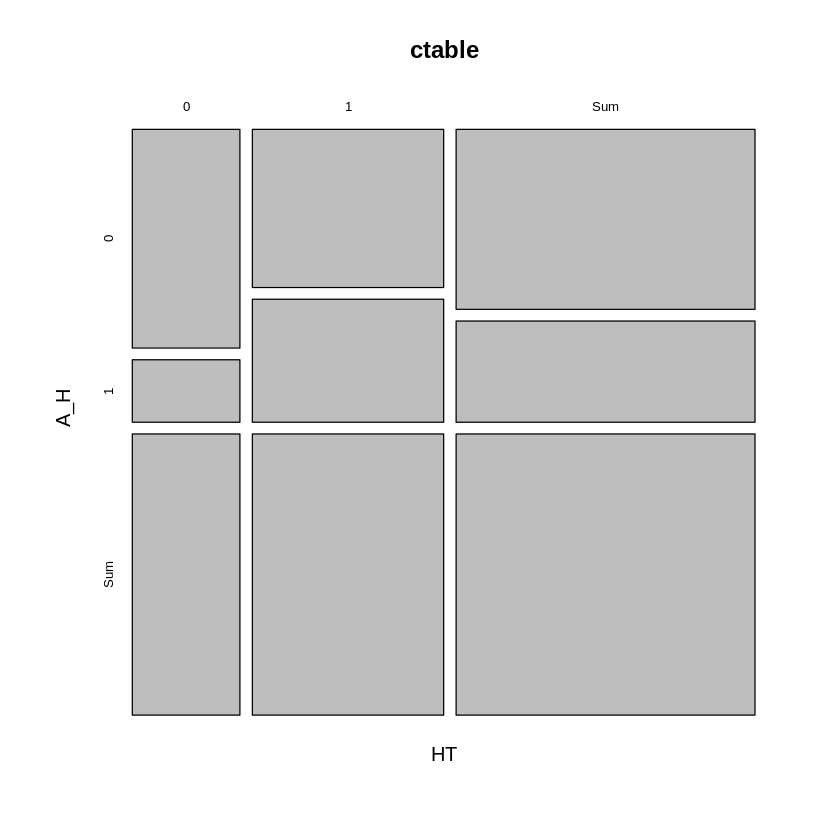

In [115]:
mosaicplot(ctable)

In [120]:
fisher.test(ctable2)
#данные не являются статистически значимыми и не можем отклонить нулевую гипотезу.


	Fisher's Exact Test for Count Data

data:  ctable2
p-value = 0.4598
alternative hypothesis: two.sided
